In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#ВВод данных linear data
x = np.array([
256.0,361.0,484.0,625.0,784.0,961.0,1156.0,1521.0,1764.0,2025.0,2304.0,169.0
])-1000
y = np.array([
40.474485,44.28800000000001,48.672000000000004,53.59786801199999,59.56816728,66.195521388,73.25249903999999,86.71392784400001,95.503225823,105.05186009,115.60976497600001,36.62553387599999
])
xerr = np.array([
32.0,38.0,44.0,50.0,56.0,62.0,68.0,78.0,84.0,90.0,96.0,26.0
])
yerr = np.array([
3.2584050000000007,3.113600000000001,3.0576000000000003,3.05875596,3.1154905600000005,3.2047047600000003,3.3160478399999995,3.5470028900000004,3.70314741,3.8748144900000008,4.058298240000001,3.569614409999999
])


In [3]:
from scipy import odr 
def f(p, x):
    k, b = p
    return k*x+b

linear = odr.Model(f)

mydata = odr.RealData(x, y, sx=xerr, sy=yerr)
myodr = odr.ODR(mydata, linear, beta0=[1, 1])

myoutput = myodr.run()

# print(true_params)
myoutput.pprint()

Beta: [3.67242547e-02 6.75469744e+01]
Beta Std Error: [9.60046337e-05 6.09201060e-02]
Beta Covariance: [[3.45339127e-06 5.27998353e-04]
 [5.27998353e-04 1.39053748e+00]]
Residual Variance: 0.0026689387241966202
Inverse Condition #: 0.0015312355594930083
Reason(s) for Halting:
  Sum of squares convergence


In [6]:
import os

import arviz as az
import theano
import pymc3 as pm
import bambi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
The installed Theano(-PyMC) version (1.0.5) does not match the PyMC3 requirements.
It was imported from ['/home/amir/PycharmProjects/LabDataTemplates/venvPhysLaba/lib/python3.8/site-packages/theano']
For PyMC3 to work, a compatible Theano-PyMC backend version must be installed.
See https://github.com/pymc-devs/pymc3/wiki for installation instructions.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


AttributeError: 'TheanoConfigParser' object has no attribute 'gcc__cxxflags'

<ErrorbarContainer object of 3 artists>

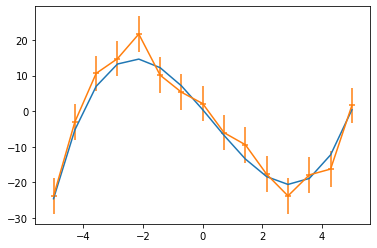

In [6]:
# data generation

def cub(p, x):
    a, b, c, d = p
    return a*x**3 + b*x**2 + c*x + d
true_params = [0.5, -0.5, -10, 0.4]
x = np.linspace(-5, 5, 15)
error = 0.5
xerr = np.ones_like(x)*0.1
yerr = np.ones_like(x)*5
y = cub(true_params, x)
noize = (np.random.normal(0, error, x.size))*np.mean(y)
y += noize
plt.plot(x, cub(true_params, x)) 
plt.errorbar(x, y, xerr=xerr, yerr=yerr) 

In [7]:
from scipy import odr 
cubModel = odr.Model(cub)

In [10]:
mydata = odr.RealData(x, y, sx=xerr, sy=yerr)
myodr = odr.ODR(mydata, cubModel, beta0=[1, 1, 1, 1])

In [11]:
myoutput = myodr.run()

In [13]:
print(true_params)
myoutput.pprint()

[0.5, -0.5, -10, 0.4]
Beta: [  0.51855287  -0.52467283 -10.68435694   1.53197458]
Beta Std Error: [0.03498022 0.09464364 0.6253285  1.14036122]
Beta Covariance: [[ 3.70877018e-03 -3.94554659e-04 -6.04365486e-02  1.78293364e-03]
 [-3.94554659e-04  2.71498656e-02  2.99860393e-03 -2.41915694e-01]
 [-6.04365486e-02  2.99860393e-03  1.18522626e+00 -1.63696552e-02]
 [ 1.78293364e-03 -2.41915694e-01 -1.63696552e-02  3.94157409e+00]]
Residual Variance: 0.32992496705445773
Inverse Condition #: 0.014629674652393489
Reason(s) for Halting:
  Sum of squares convergence
